In [1]:
import arviz as az
import numpy as np

# ArviZ ships with style sheets!
az.style.use("arviz-darkgrid")

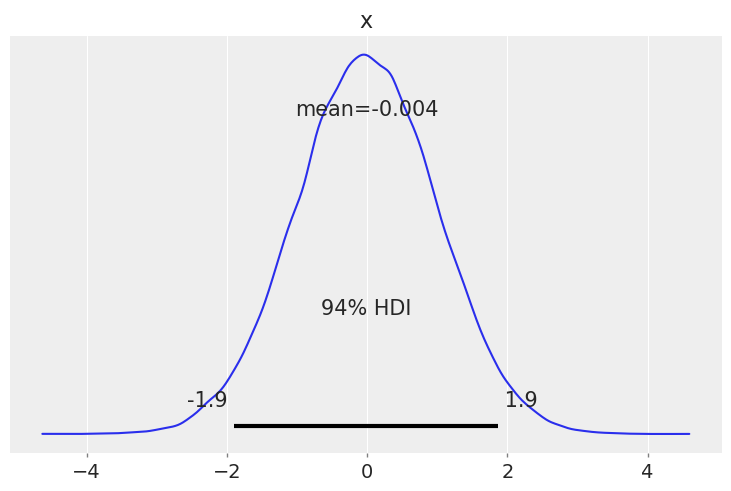

In [2]:
az.plot_posterior(np.random.randn(100_000));

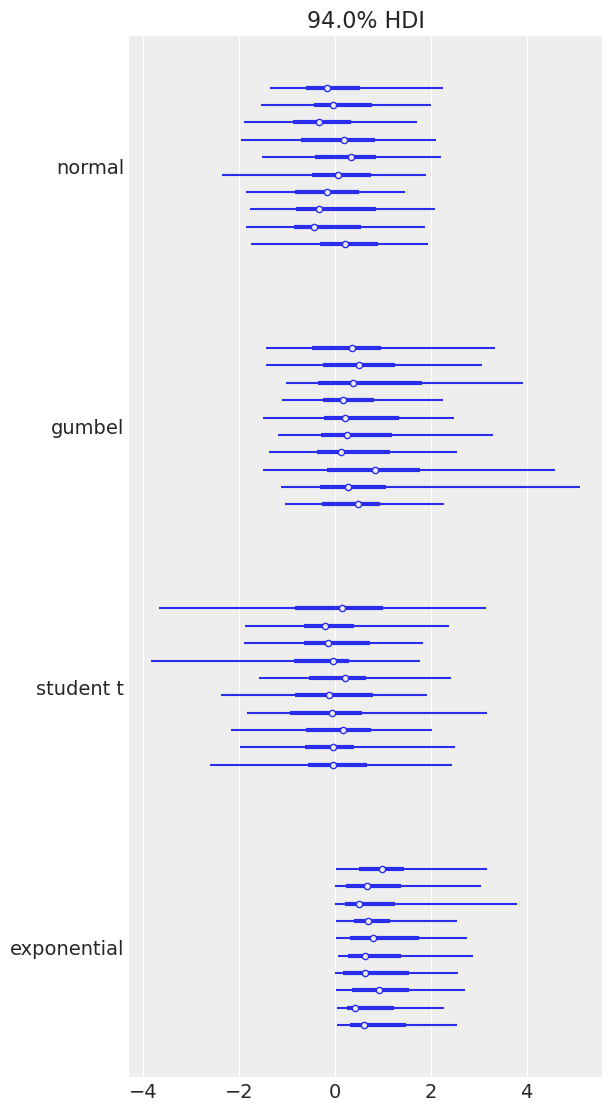

In [3]:
size = (10, 50)
az.plot_forest(
    {
        "normal": np.random.randn(*size),
        "gumbel": np.random.gumbel(size=size),
        "student t": np.random.standard_t(df=6, size=size),
        "exponential": np.random.exponential(size=size),
    }
);

## ArviZ rcParams


In [4]:
az.rcParams['stats.hdi_prob'] = 0.90

In [5]:
import pymc3 as pm

J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])
schools = np.array(
    [
        "Choate",
        "Deerfield",
        "Phillips Andover",
        "Phillips Exeter",
        "Hotchkiss",
        "Lawrenceville",
        "St. Paul's",
        "Mt. Hermon",
    ]
)

In [6]:
with pm.Model() as centered_eight:
    mu = pm.Normal("mu", mu=0, sd=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta = pm.Normal("theta", mu=mu, sd=tau, shape=J)
    obs = pm.Normal("obs", mu=theta, sd=sigma, observed=y)

    # This pattern is useful in PyMC3
    prior = pm.sample_prior_predictive(return_inferencedata=True)
    centered_eight_trace = pm.sample()
    posterior_predictive = pm.sample_posterior_predictive(centered_eight_trace)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if __name__ == '__main__':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, tau, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
There were 53 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6583181186463494, but should be close to 0.8. Try to increase the number of tuning steps.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
There were 56 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.702534744392359, but should be close to 0.8. Try to increase the number of tuning steps.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.685450069382348, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


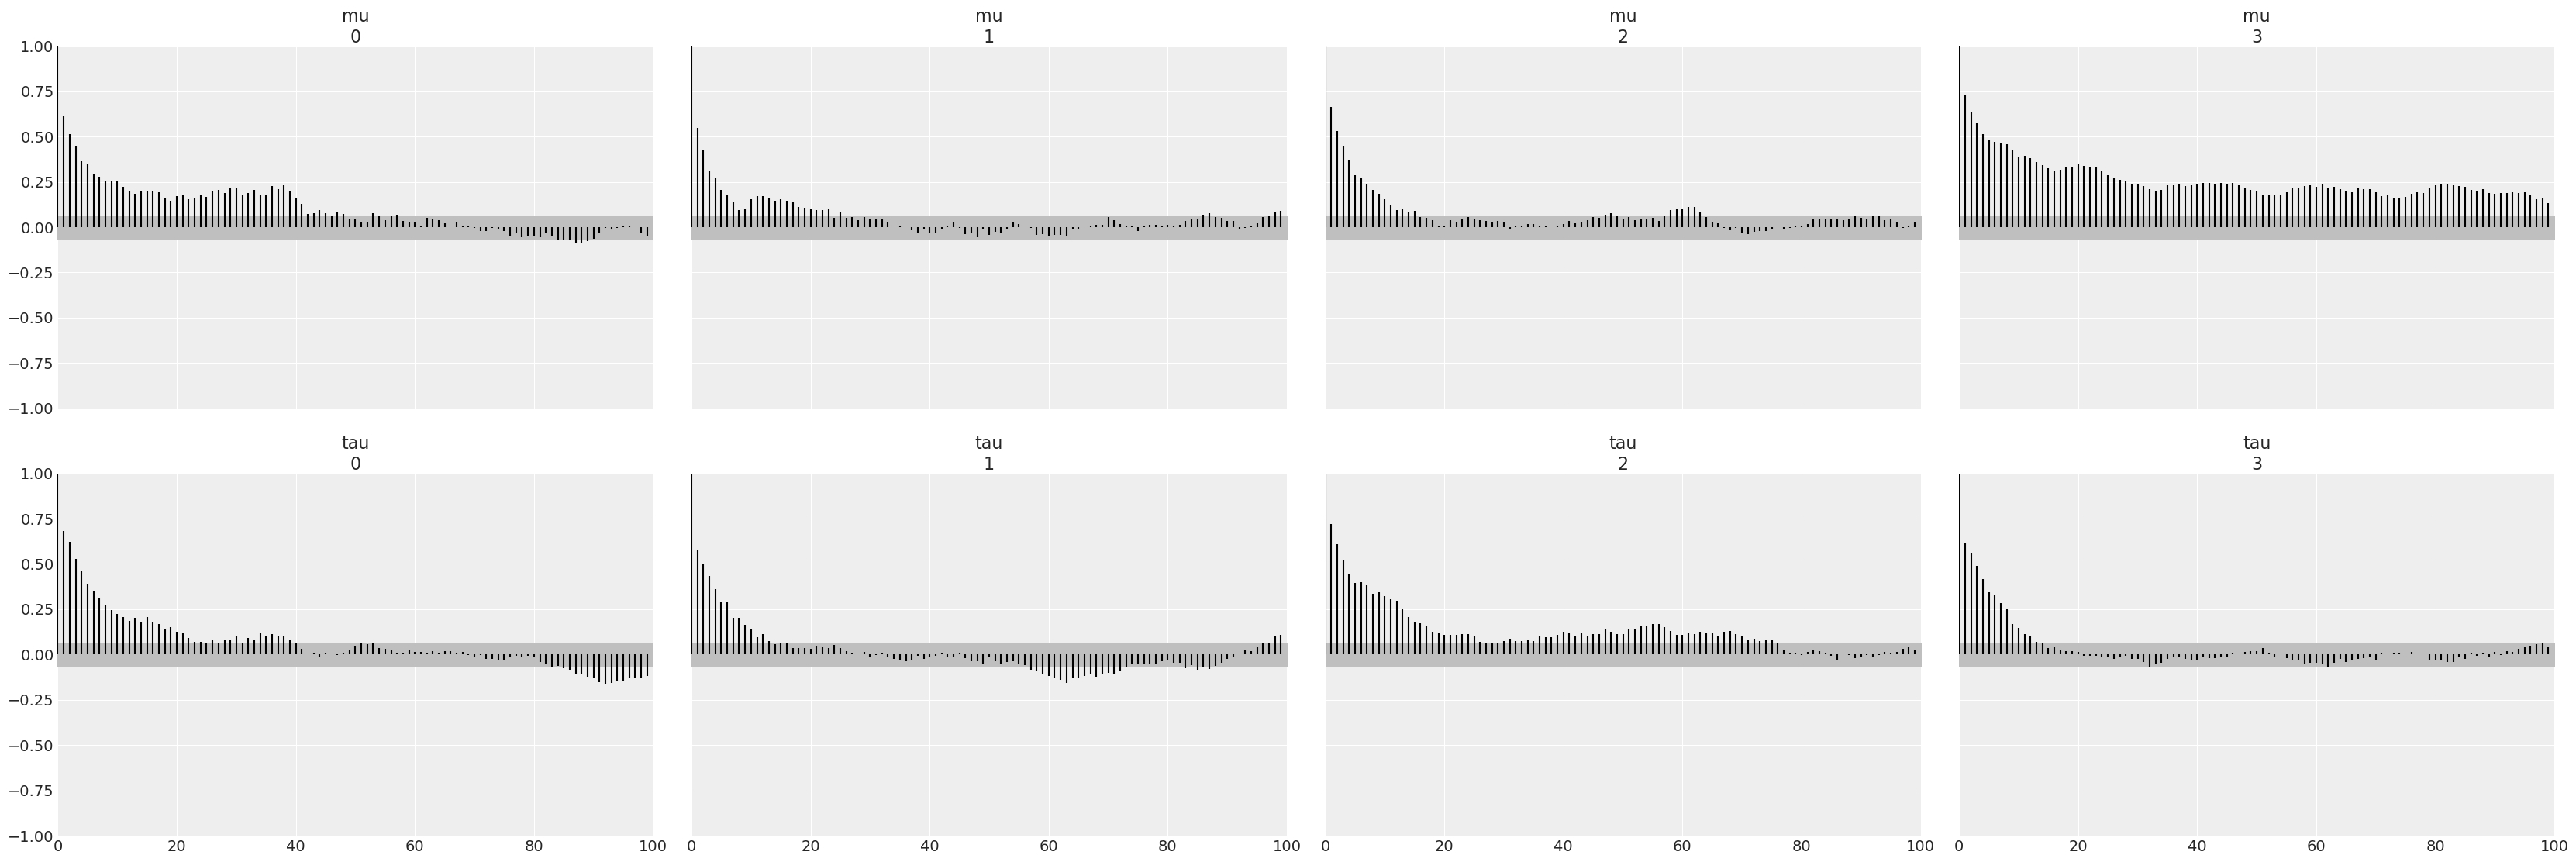

In [7]:
az.plot_autocorr(centered_eight_trace, var_names=["mu", "tau"]);

### data = az.from_pymc3(
    trace=centered_eight_trace,
    prior=prior,
    posterior_predictive=posterior_predictive,
    model=centered_eight,
    coords={"school": schools},
    dims={"theta": ["school"], "obs": ["school"]},
)
data

In [36]:
data.posterior

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 1000, school: 8)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * school   (school) <U16 'Choate' 'Deerfield' ... "St. Paul's" 'Mt. Hermon'
Data variables:
    mu       (chain, draw) float64 11.68 11.32 13.45 ... -0.4972 15.84 4.577
    theta    (chain, draw, school) float64 7.783 11.37 12.15 ... 6.384 4.901
    tau      (chain, draw) float64 4.182 2.212 2.385 4.955 ... 8.954 6.406 9.261
Attributes:
    created_at:                 2021-05-29T00:58:06.251046
    arviz_version:              0.11.2
    inference_library:          pymc3
    inference_library_version:  3.11.2
    sampling_time:              4.6675496101379395
    tuning_steps:               1000

#### tmp = data.posterior.to_dataframe().unstack()
tmp

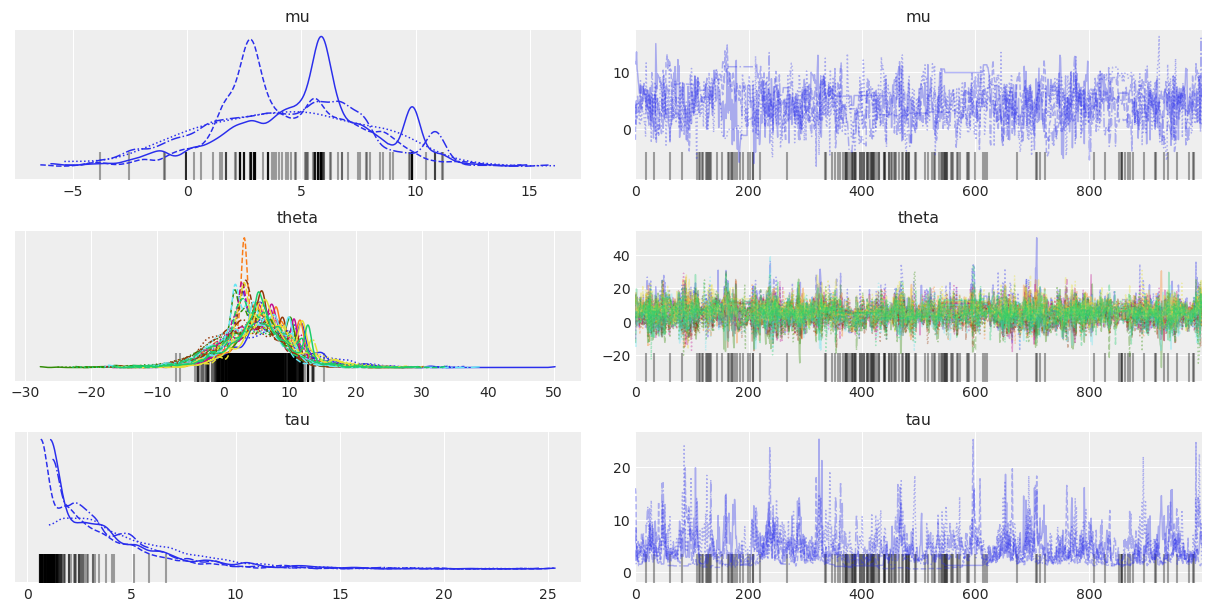

In [10]:
az.plot_trace(data);